In [1]:
import pandas as pd
import numpy as np

In [13]:
dataset=pd.read_csv("DataScience_Salary.csv")
dataset

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
...,...,...,...,...,...,...,...,...,...
3756,2020,SE,FT,Principal Data Scientist,130000,EUR,148261,DE,M
3757,2020,SE,FT,Data Scientist,80000,EUR,91237,AT,S
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M
3759,2020,SE,FT,Machine Learning Engineer,40000,EUR,45618,HR,S


In [14]:
dataset.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'company_location',
       'company_size'],
      dtype='object')

In [15]:
dir(dataset)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '

In [16]:
quan=[]
qual=[]
for columnsName in dataset:
    if dataset[columnsName].dtype=='O':
        qual.append(columnsName)
    else:
        quan.append(columnsName)

In [17]:
dataset[quan]

,work_year,salary,salary_in_usd
0,2023,213660,213660
1,2023,130760,130760
2,2023,100000,100000
3,2023,30000,30000
4,2023,204620,204620
...,...,...,...
3756,2020,130000,148261
3757,2020,80000,91237
3758,2020,190200,190200
3759,2020,40000,45618


In [18]:
dataset.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


In [19]:
descriptive=pd.DataFrame(index=["Mean","Median","Mode","Q1=25%","Q2=50%","Q3=75%","Q4=100%","IQR","1.5Rule","Lesser","Greater","Max","Min","skew","Kurtosis","variance","sd"],columns=quan)
for columnsName in quan:
    descriptive[columnsName]["Mean"]=dataset[columnsName].mean()
    descriptive[columnsName]["Median"]=dataset[columnsName].median()
    descriptive[columnsName]["Mode"]=dataset[columnsName].mode()[0]
    descriptive[columnsName]["Q1=25%"]=dataset.describe()[columnsName]["25%"]
    descriptive[columnsName]["Q2=50%"]=dataset.describe()[columnsName]["50%"]
    descriptive[columnsName]["Q3=75%"]=dataset.describe()[columnsName]["75%"]
    descriptive[columnsName]["Q4=100%"]=dataset.describe()[columnsName]["max"]
    descriptive[columnsName]["IQR"]=descriptive[columnsName]["Q3=75%"]-descriptive[columnsName]["Q1=25%"]
    descriptive[columnsName]["1.5Rule"]=1.5*descriptive[columnsName]["IQR"]
    descriptive[columnsName]["Lesser"]=descriptive[columnsName]["Q1=25%"]-descriptive[columnsName]["1.5Rule"]
    descriptive[columnsName]["Greater"]=descriptive[columnsName]["Q3=75%"]+descriptive[columnsName]["1.5Rule"]
    descriptive[columnsName]["Max"]=dataset[columnsName].max()
    descriptive[columnsName]["Min"]=dataset[columnsName].min()
    descriptive[columnsName]["skew"]=dataset[columnsName].skew()
    descriptive[columnsName]["Kurtosis"]=dataset[columnsName].kurtosis()
    descriptive[columnsName]["variance"]=dataset[columnsName].var()
    descriptive[columnsName]["sd"]=dataset[columnsName].std()

In [20]:
descriptive

,work_year,salary,salary_in_usd
Mean,2022.374103,190599.8862,137555.178942
Median,2022.0,137500.0,135000.0
Mode,2023,100000,100000
Q1=25%,2022.0,100000.0,95000.0
Q2=50%,2022.0,137500.0,135000.0
Q3=75%,2023.0,180000.0,175000.0
Q4=100%,2023.0,30400000.0,450000.0
IQR,1.0,80000.0,80000.0
1.5Rule,1.5,120000.0,120000.0
Lesser,2020.5,-20000.0,-25000.0


In [21]:
freqTable=pd.DataFrame(columns=["Unique_vale","Frequency","Relative_Frequency","cumsum"])
freqTable

,Unique_vale,Frequency,Relative_Frequency,cumsum


In [24]:
freqTable["Unique_value"]=dataset["work_year"].value_counts().index
freqTable["Frequency"]=dataset["work_year"].value_counts().values
freqTable["Relative_Frequency"]=freqTable["Frequency"]/len(dataset["work_year"])
freqTable["cumsum"]=freqTable["Relative_Frequency"]

In [27]:
import matplotlib.pyplot as plt

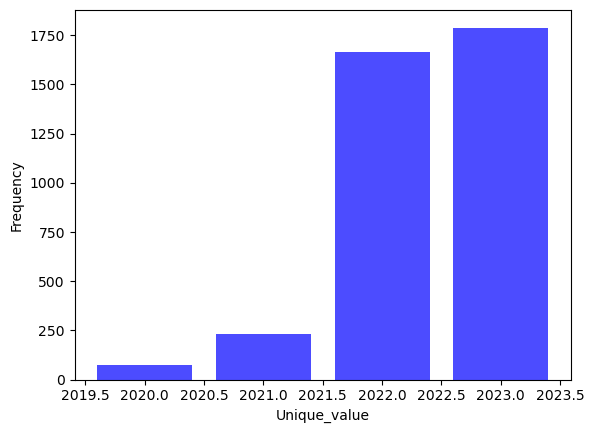

In [29]:
freqTable["Unique_value"] = freqTable["Unique_value"]
plt.bar(freqTable["Unique_value"], freqTable["Frequency"], width=0.8, color='blue', alpha=0.7)
plt.xlabel("Unique_value")
plt.ylabel("Frequency")
plt.show()

In [30]:
def get_pdf_probability(dataset,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Red')
    pyplot.axvline(startrange,color='Purple')
    pyplot.axvline(endrange,color='Orange')
    #generate sample
    sample=dataset
    #calculate parameters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation%3f',(sample_mean,sample_std))
    #define distribution
    distribution=norm(sample_mean,sample_std)
    #sample probabilities
    value=[value for value in range(startrange,endrange)]
    probabilities=[distribution.pdf(value) for value in value]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,prob))
    return prob

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\540936418.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(dataset,kde=True,kde_kws={'color':'blue'},color='Red')


Mean=%.3f, Standard Deviation%3f (190599.8862004786, 671145.7156359237)
The area between range(200000,450000):0.14485065512856432


0.14485065512856432

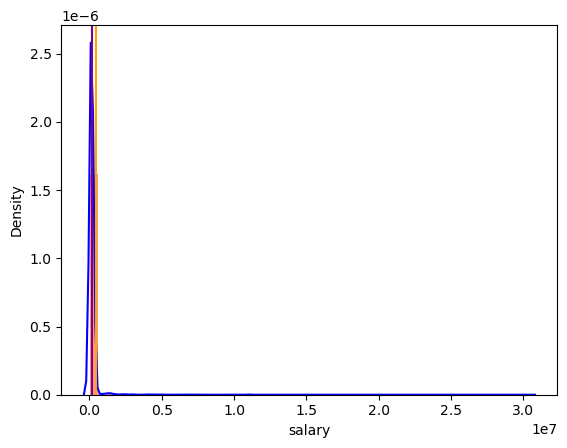

In [32]:
get_pdf_probability(dataset["salary"],200000,450000)

In [34]:
from statsmodels.distributions.empirical_distribution import ECDF
cdf=ECDF(dataset["salary"])
cdf(250000)

0.9404413719755385

In [35]:
def stdNDgraph(dataset):
    #import seaborn library
    import seaborn as sns
    #calculate mean and std
    mean=dataset.mean()
    std=dataset.std()
    z_score=[]
    for i in dataset:
        Z_scoreV=((i-mean)/std)
        z_score.append(Z_scoreV)
    sns.distplot(z_score,kde=True)
    sum (z_score)/len(z_score)

C:\Users\hp\AppData\Local\Temp\ipykernel_14132\3209594853.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(z_score,kde=True)


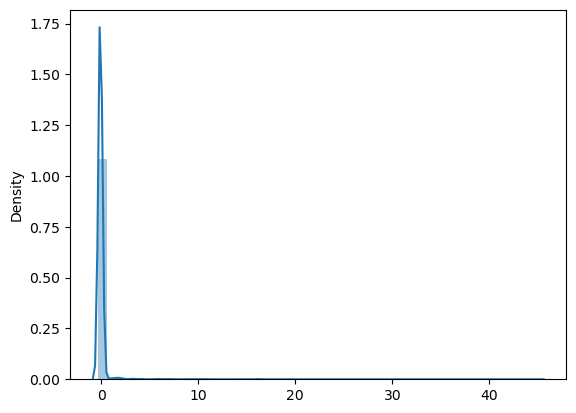

In [36]:
stdNDgraph(dataset["salary"])